
## Predict The Flight Ticket Price 

Flight price can be something hard to guess, because prices are vary on the daily basis. 
We might have often heard travellers saying that flight ticket prices are so unpredictable.Here we take on the challenge! 
we are gonna prove that given the right data anything can be predicted. 
Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #graphical representation

In [2]:
# read train and test dataset, and merge both datset 
final_dataset=pd.read_excel('Data_Train.xlsx')
# df_test = pd.read_excel('Test_set.xlsx')
#final_dataset=df_train.append(df_test,sort=False)


In [3]:
final_dataset.shape

(10683, 11)

In [4]:
# get details about dataset
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
final_dataset.columns #get informatin about column names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Feature Engineering 

In [7]:
## firstly work on Total_Stops column, split the string and remove "stops" string attached with digit value.     
final_dataset['Total_Stops']= final_dataset['Total_Stops'].str.split(' ').str[0] 
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [8]:
# Now replace non-stop with 0
final_dataset["Total_Stops"] =final_dataset["Total_Stops"].replace('non-stop',0)
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [9]:
#check null values Total_Stops column
final_dataset["Total_Stops"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
# get count of null values in Total_Stops column
final_dataset[final_dataset["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

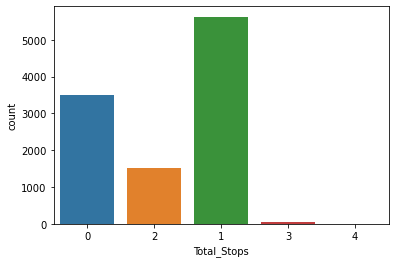

In [11]:
sns.countplot(x='Total_Stops',data=final_dataset)

According to above barplot 1-stop has maximum number so replace NaN with 1-stop 

In [12]:
final_dataset["Total_Stops"]=final_dataset["Total_Stops"].fillna(1)

In [13]:
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [14]:
# check data type of features 
final_dataset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
# change data type of Total_Stops column into Int
final_dataset["Total_Stops"]= final_dataset["Total_Stops"].astype(int)

In [16]:
final_dataset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
dtype: object

In [17]:
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [18]:
#Now do some feature enginnering on Route column
final_dataset[final_dataset["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,1,No info,7480


In [19]:
# remove empty row of Route column
final_dataset.dropna(subset=["Route"],inplace=True) # if Route column contain NaN,remove that row


In [20]:
final_dataset[final_dataset["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [21]:
# perform string split functionality and create new columns as per name number of route >
final_dataset['Route_1'] = final_dataset['Route'].str.split("→").str[0]
final_dataset['Route_2'] = final_dataset['Route'].str.split("→").str[1]
final_dataset['Route_3'] = final_dataset['Route'].str.split("→").str[2]
final_dataset['Route_4'] = final_dataset['Route'].str.split("→").str[3]
final_dataset['Route_5'] = final_dataset['Route'].str.split("→").str[4]

In [22]:
# drop Route columnn
final_dataset= final_dataset.drop(['Route'],axis=1) # remove column so axis value is 1
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,BLR,NAG,DEL,NaN,NaN


get day,month and year value from "Date_of_Journey" column using string split
split data by using "/"(char split)


In [23]:
final_dataset["Day"]= final_dataset["Date_of_Journey"].str.split("/").str[0]
final_dataset["Month"]= final_dataset["Date_of_Journey"].str.split("/").str[1]
final_dataset["Year"]= final_dataset["Date_of_Journey"].str.split("/").str[2]

# convert "Day","Month" and "Year" column to Int value
final_dataset["Day"]=final_dataset["Day"].astype(int)
final_dataset["Month"]=final_dataset["Month"].astype(int)
final_dataset["Year"]=final_dataset["Year"].astype(int)

#remove Date_of_Journey Column 
final_dataset=final_dataset.drop(['Date_of_Journey'],axis=1)
#print dataset
final_dataset.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897,BLR,DEL,NaN,NaN,NaN,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,CCU,IXR,BBI,BLR,NaN,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882,DEL,LKO,BOM,COK,NaN,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,CCU,NAG,BLR,NaN,NaN,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,BLR,NAG,DEL,NaN,NaN,1,3,2019


<AxesSubplot:xlabel='Year', ylabel='count'>

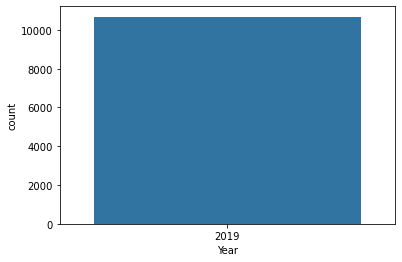

In [24]:
# count how many years data is present in the dataset
sns.countplot(x='Year',data=final_dataset)

As we notice above only 2019 year is present in the dataset, so we can remove year column from final_dataset

In [25]:
#remove Year Column
final_dataset=final_dataset.drop(['Year'],axis=1)
final_dataset.dtypes  # check data type of all columns

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
Day                 int32
Month               int32
dtype: object

remove month attach with "Arrival_Time" column using string split

In [26]:
final_dataset["Arrival_Time"]=final_dataset["Arrival_Time"].str.split(' ').str[0]
final_dataset.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897,BLR,DEL,NaN,NaN,NaN,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,CCU,IXR,BBI,BLR,NaN,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2,No info,13882,DEL,LKO,BOM,COK,NaN,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,CCU,NAG,BLR,NaN,NaN,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,BLR,NAG,DEL,NaN,NaN,1,3


convert hour Duration value to min

In [27]:
final_dataset['Duration']= final_dataset['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
final_dataset.head()


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10,170,0,No info,3897,BLR,DEL,NaN,NaN,NaN,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,445,2,No info,7662,CCU,IXR,BBI,BLR,NaN,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25,1140,2,No info,13882,DEL,LKO,BOM,COK,NaN,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1,No info,6218,CCU,NAG,BLR,NaN,NaN,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1,No info,13302,BLR,NAG,DEL,NaN,NaN,1,3


In [28]:
final_dataset["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Convert No Info in No info because both same

In [29]:
final_dataset["Additional_Info"] = final_dataset["Additional_Info"].replace({'No Info': 'No info'})
final_dataset["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Now Create new columns to store "Dep_Time" and "Arrival_Time" s hour and minutes  

In [30]:
# Dep_Time
final_dataset["Dep_hour"] = pd.to_datetime(final_dataset["Dep_Time"]).dt.hour
final_dataset["Dep_min"] = pd.to_datetime(final_dataset["Dep_Time"]).dt.minute
final_dataset.drop(["Dep_Time"], axis = 1, inplace = True) #remove column

# Arrival_Time
final_dataset["Arrival_hour"] = pd.to_datetime(final_dataset.Arrival_Time).dt.hour
final_dataset["Arrival_min"] = pd.to_datetime(final_dataset.Arrival_Time).dt.minute
final_dataset.drop(["Arrival_Time"], axis = 1, inplace = True) # remove column


final_dataset.head()   # print dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,BLR,DEL,NaN,NaN,NaN,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,CCU,IXR,BBI,BLR,NaN,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,DEL,LKO,BOM,COK,NaN,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,CCU,NAG,BLR,NaN,NaN,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,BLR,NAG,DEL,NaN,NaN,1,3,16,50,21,35


## Data Visualization (do some data observation and check corrlation between features)

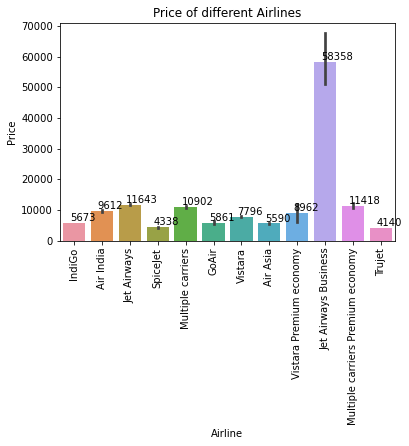

In [31]:
# Airline Vs Price 
plt.title('Price of different Airlines')
chart=sns.barplot(x='Airline',y='Price',data=final_dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
for p in chart.patches:
    chart.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

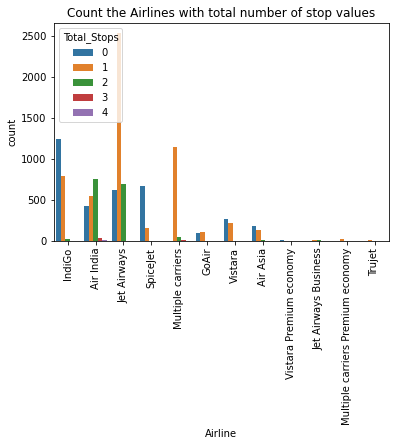

In [32]:
#Airline Vs number of stops
plt.title('Count the Airlines with total number of stop values')
bar=sns.countplot(x='Airline',hue='Total_Stops',data=final_dataset)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)


As we can see most of the flight are traveled Non stop and One stop

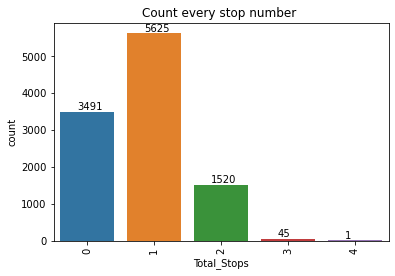

In [33]:
#Count every stop quantity
plt.title('Count every stop number ')
bar=sns.countplot(x='Total_Stops',data=final_dataset)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
for p in bar.patches:
    bar.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

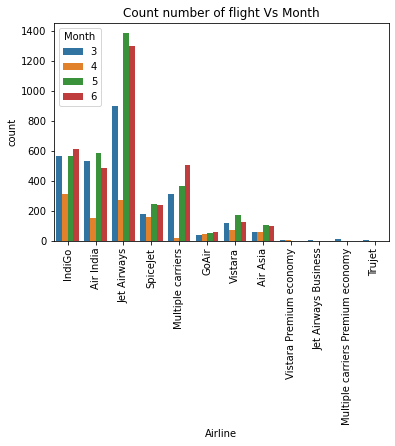

In [34]:
# plot number of Airline fly in Month 
plt.title('Count number of flight Vs Month')
bar=sns.countplot(x='Airline',hue='Month',data=final_dataset)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

C:\Users\Sarb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of ticket')

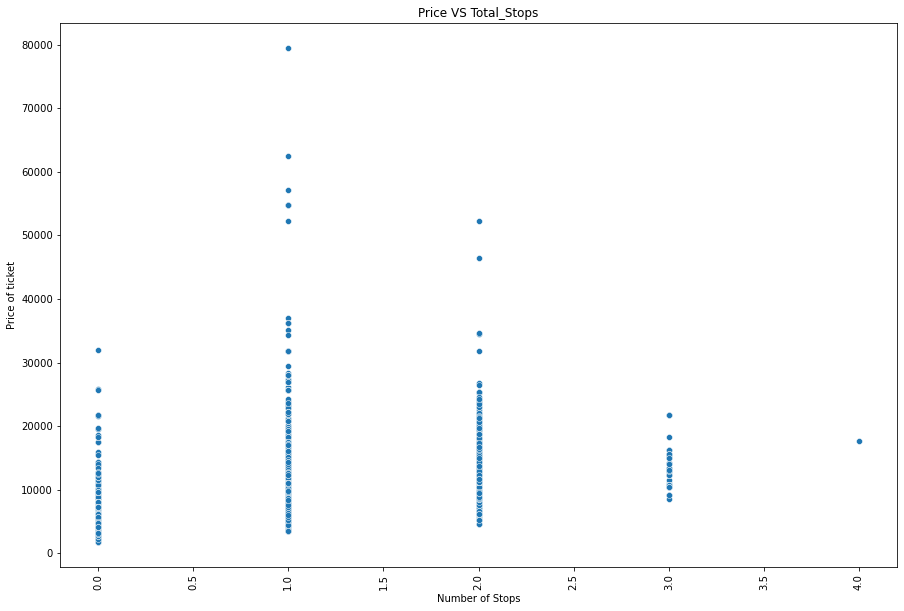

In [35]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Total_Stops')
sns.scatterplot(final_dataset['Total_Stops'], final_dataset['Price'],data=final_dataset)
plt.xticks(rotation = 90)
plt.xlabel('Number of Stops')
plt.ylabel('Price of ticket')

C:\Users\Sarb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of ticket')

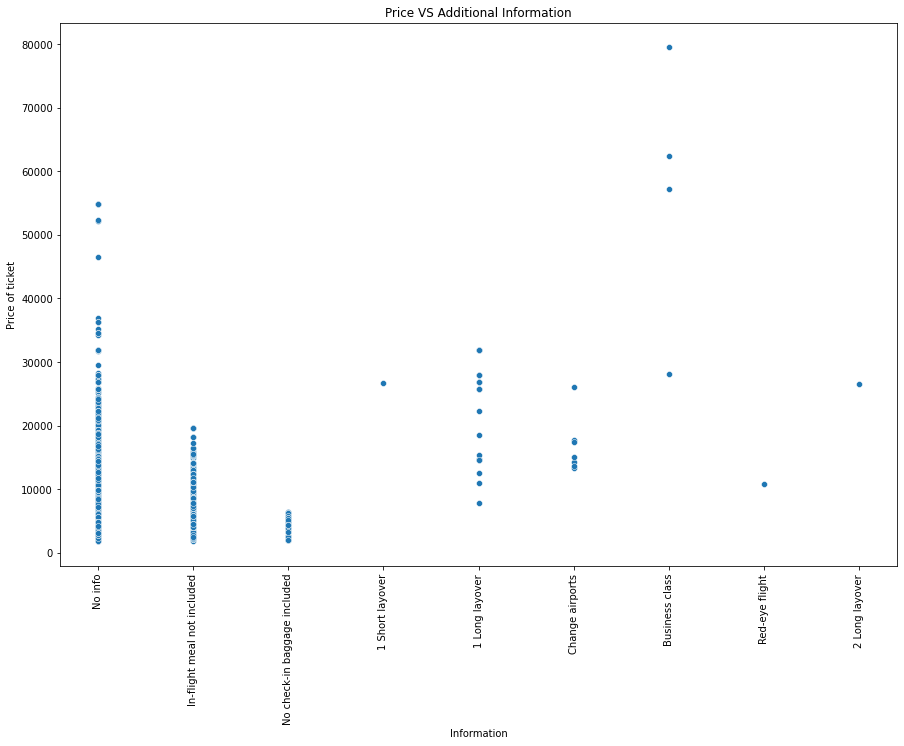

In [36]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(final_dataset['Additional_Info'], final_dataset['Price'],data=final_dataset)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From the above scatter plot,it is clear that the business class ticket price is high 

# Pre-processing data

replace NaN value with None present on Route_1,Route_2,Route_3 and Route_4

In [37]:
final_dataset["Route_1"].fillna("None",inplace=True)
final_dataset["Route_2"].fillna("None",inplace=True)
final_dataset["Route_3"].fillna("None",inplace=True)
final_dataset["Route_4"].fillna("None",inplace=True)
final_dataset["Route_5"].fillna("None",inplace=True)

In [38]:
final_dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,BLR,DEL,None,None,None,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,CCU,IXR,BBI,BLR,None,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,DEL,LKO,BOM,COK,None,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,CCU,NAG,BLR,None,None,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,BLR,NAG,DEL,None,None,1,3,16,50,21,35


In [39]:
#check number of missing value on complete dataset
final_dataset.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Day                0
Month              0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

### Below do label encoding to convert categorical column to digital values 

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
final_dataset["Airline"]= encoder.fit_transform(final_dataset["Airline"])
final_dataset["Source"]= encoder.fit_transform(final_dataset["Source"])
final_dataset["Destination"]= encoder.fit_transform(final_dataset["Destination"])
final_dataset["Additional_Info"]= encoder.fit_transform(final_dataset["Additional_Info"])
final_dataset["Route_1"]= encoder.fit_transform(final_dataset["Route_1"])
final_dataset["Route_2"]= encoder.fit_transform(final_dataset["Route_2"])
final_dataset["Route_3"]= encoder.fit_transform(final_dataset["Route_3"])
final_dataset["Route_4"]= encoder.fit_transform(final_dataset["Route_4"])
final_dataset["Route_5"]= encoder.fit_transform(final_dataset["Route_5"])
final_dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,0,7,3897,0,13,29,13,5,24,3,22,20,1,10
1,1,3,0,445,2,7,7662,2,25,1,3,5,1,5,5,50,13,15
2,4,2,1,1140,2,7,13882,3,32,4,5,5,9,6,9,25,4,25
3,3,3,0,325,1,7,6218,2,34,3,13,5,12,5,18,5,23,30
4,3,0,5,285,1,7,13302,0,34,8,13,5,1,3,16,50,21,35


<AxesSubplot:>

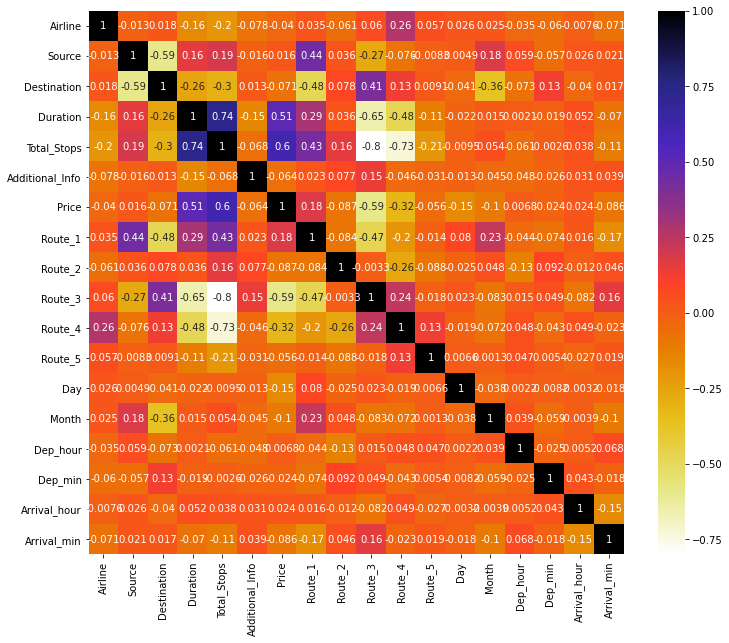

In [41]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
corr= final_dataset.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

According to Pearson correlation heatmap we observed that "Price" feature is not highly correltive with 
"Dep_hour","Dep_min","Arrival_hour" and "Arrival_min", so drop these features

In [42]:
#drop below features
# Dep_Time
final_dataset.drop(["Dep_hour"], axis = 1, inplace = True) #remove column
final_dataset.drop(["Dep_min"], axis = 1, inplace = True) #remove column

# Arrival_Time
final_dataset.drop(["Arrival_hour"], axis = 1, inplace = True) #remove column
final_dataset.drop(["Arrival_min"], axis = 1, inplace = True) #remove column

#check dataset
final_dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Day,Month
0,3,0,5,170,0,7,3897,0,13,29,13,5,24,3
1,1,3,0,445,2,7,7662,2,25,1,3,5,1,5
2,4,2,1,1140,2,7,13882,3,32,4,5,5,9,6
3,3,3,0,325,1,7,6218,2,34,3,13,5,12,5
4,3,0,5,285,1,7,13302,0,34,8,13,5,1,3


# Now Our Dataset is ready 

## Feature Selection

In [43]:
from sklearn.model_selection import train_test_split
#GridSearchCv is used to get best parameters combinations
# cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# below lines is used to import metrics to find out errors in the algorithms
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt


#function to get mean absolute error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



#divide dataset into train and test part
# df_train= final_dataset[0:]
# #df_test= final_dataset[8683:]

x=final_dataset.drop(["Price"],axis=1)
y=final_dataset["Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) #75% train and 25% test


In [44]:
x_train.shape # size of train dataset

(8011, 13)

In [45]:
x_test.shape   #size of test dataset

(2671, 13)

# > Build Machine Learning Algorithms

## Lasso Algorithm

In [46]:
from sklearn.linear_model import Lasso
lasso= Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lassoRegressor= GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)


In [47]:
lassoRegressor.fit(x_train,y_train)
print(lassoRegressor.best_params_) #best parameter
print(lassoRegressor.best_score_) #score

C:\Users\Sarb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34922608764.28612, tolerance: 13805082.951369788
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sarb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32972756871.98915, tolerance: 13168781.406734748
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sarb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32734186525.15972, tolerance: 13221721.388986863
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sarb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

{'alpha': 5}
-10496769.090256875


In [48]:
y_pred= lassoRegressor.predict(x_test)

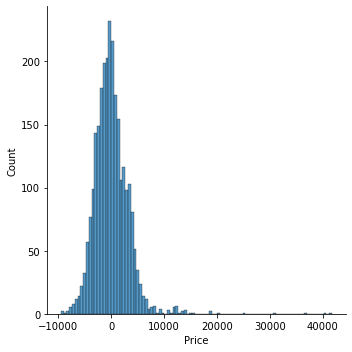

In [49]:
sns.displot(y_test-y_pred)

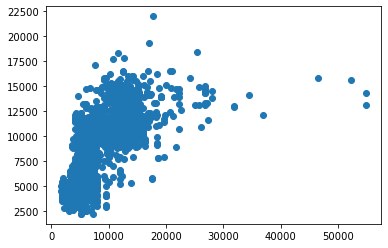

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
# test result of lasso algorithm
print("Test result of Lasso ----------")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared= ", r2_score(y_test,y_pred))

Test result of Lasso ----------
Root mean squared error:  3414.9436604168536
Mean absolute % error:  29
R-squared=  0.4830582808801832


## K Neighbour Regressor 

firstly find the value of k, where the model gives higher efficency

In [52]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors=[int(x) for x in np.linspace(start=1,stop=30,num=30)] #range of k values
r_score =np.empty(len(n_neighbors)) #create empty array to store score values 

for i in n_neighbors:
    knn_model=KNeighborsRegressor(i)
    knn_model.fit(x_train, y_train)
    r_score[i-1]=r2_score(y_test,knn_model.predict(x_test))

    
#grid search param_grid
#params= {'n_neighbors':n_neighbors
           #}
#knn_model=KNeighborsRegressor(20)

#knn_model=GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params, cv =10, scoring = 'neg_mean_squared_error')

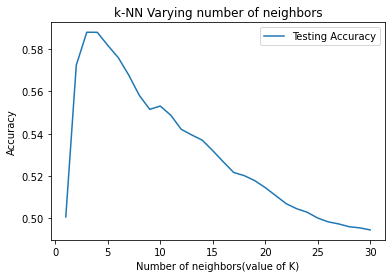

In [53]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(n_neighbors,  r_score,label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors(value of K)')
plt.ylabel('Accuracy')
plt.show()    

According to above plot at k=3,4 model gives higher efficency 

In [54]:
knn_model=KNeighborsRegressor(3)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
y_pred=knn_model.predict(x_test)

C:\Users\Sarb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

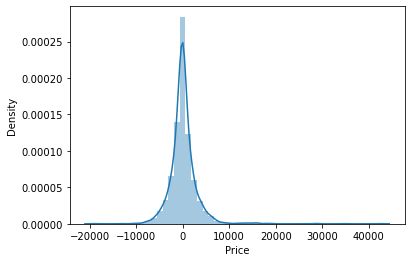

In [56]:
sns.distplot(y_test-y_pred)

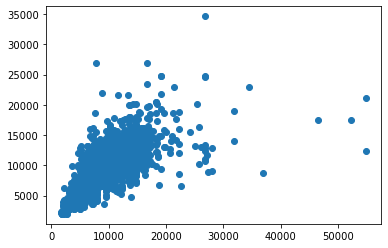

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
# test result of K Neighbour Regressor algorithm
print("Test result of K Neighbour Regressor")
print(55 * '>')
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Test result of K Neighbour Regressor
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Root mean squared error:  3048.930384071944
Mean absolute % error:  19
R-squared:  0.5879314085893841


## RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
#number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=5)]
#number of features in every split
max_features=['auto','sqrt']
#maximum level in the tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum num.  of samples reqires to split a node
min_samples_split=[2,5,10]
#minimum num.  of samples required at each leaf node
min_samples_leaf= [1,2,4]


In [60]:
#create random grid
randomGrid= {'n_estimators':n_estimators,
            'max_features':max_features,
            'min_samples_split': min_samples_split,
             'max_depth':max_depth,
            'min_samples_leaf': min_samples_leaf}
print(randomGrid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4]}


In [61]:
#Method to find efficent parameters for the Random forest regressor
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=randomGrid,
                                scoring='neg_mean_absolute_error',n_iter=20,
                                cv=5,n_jobs = -1)

In [62]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [63]:
print(rf_random.best_params_) #best parameter
print("best score = " + str(rf_random.best_score_)) #score

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
best score = -787.1882759606798


In [64]:
y_pred=rf_random.predict(x_test)

C:\Users\Sarb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

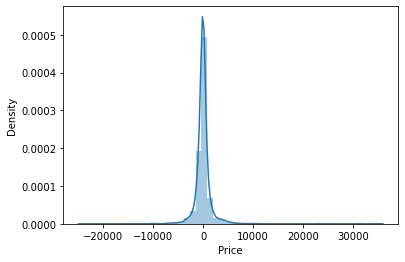

In [65]:
sns.distplot(y_test-y_pred)

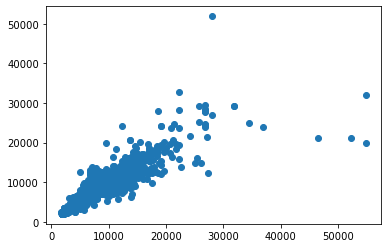

In [66]:
plt.scatter(y_test,y_pred)

In [67]:
# test result of Random Forest Regressor algorithm
print("Test result of Random Forest Regressor")
print(70 * '>')
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Test result of Random Forest Regressor
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Root mean squared error:  1899.916527164996
Mean absolute % error:  9
R-squared:  0.8399913217154301


## Decision Tree Regressor

In [68]:
#from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

depth=[int(x) for x in np.linspace(start=1,stop=20,num=20)]
#minimum num.  of samples reqires to split a node
min_samples_split=[2,5,10]
#minimum num.  of samples required at each leaf node
min_samples_leaf= [1,2,4]

#grid search param_grid
params= {'max_depth':depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf
           }

dTree_model=GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv =5,scoring = 'neg_mean_squared_error')

In [69]:
dTree_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [70]:
print(dTree_model.best_params_) #best parameter
print("best score = " + str(dTree_model.best_score_)) #score

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5}
best score = -3518681.2033693506


In [71]:
y_pred=dTree_model.predict(x_test)

C:\Users\Sarb\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

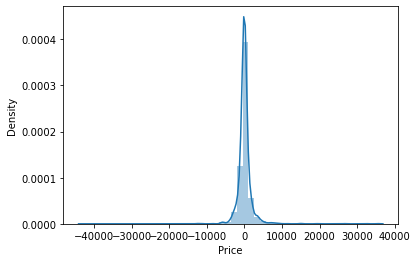

In [72]:
sns.distplot(y_test-y_pred)

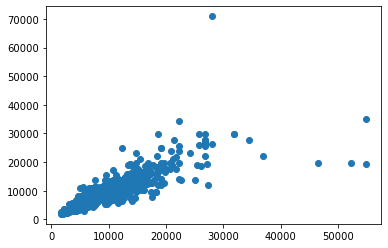

In [73]:
plt.scatter(y_test,y_pred)

In [74]:
# test result of Decision Tree Regressor algorithm
print("Test result of Decision Tree Regressor")
print(55 * '>')
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Test result of Decision Tree Regressor
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Root mean squared error:  2098.0602376433585
Mean absolute % error:  11
R-squared:  0.8048761291986115


## XGB Regressor

In [75]:
from xgboost import XGBRegressor

#number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=5)]
#depth 
max_depth =[1, 2, 3, 4, 5] 
learning_rate =[0.01, 0.05, 0.1]
reg_lambda= [0.001, 0.1, 1.0, 10.0, 100.0]
#grid search param_grid
params={'n_estimators':n_estimators,
 'max_depth': max_depth,
 'learning_rate':learning_rate,
 'reg_lambda':reg_lambda
          }
print(params)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}


In [76]:
xgb_model=RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=params,
                                scoring='neg_mean_absolute_error',n_iter=20,
                                cv=5,n_jobs = -1)

In [77]:
xgb_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [78]:
print(xgb_model.best_params_) #best parameter
print("best score = " + str(xgb_model.best_score_)) #score

{'reg_lambda': 0.001, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
best score = -836.0938646778695


In [79]:
y_pred=xgb_model.predict(x_test)

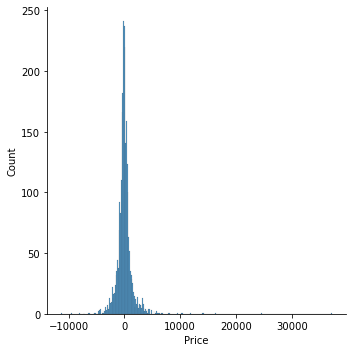

In [83]:
sns.displot(y_test-y_pred)

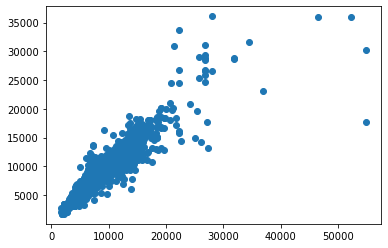

In [81]:
plt.scatter(y_test,y_pred)

In [82]:
# test result of XGBRegressor algorithm
print("Test result of XGBRegressor")
print(55 * '>')
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Test result of XGBRegressor
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Root mean squared error:  1669.609593546446
Mean absolute % error:  10
R-squared:  0.8764324717198742


## As per observation , XGB Regressor is giving Maximum Accuracy as compare to other Regressor algorithm.